In [2]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

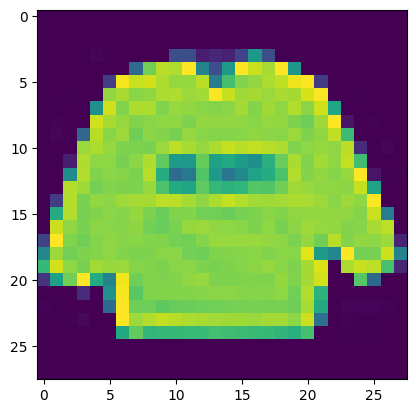

In [3]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [4]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [6]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [8]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [12]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8125 - loss: 0.5444 - val_accuracy: 0.8538 - val_loss: 0.3982
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8766 - loss: 0.3493 - val_accuracy: 0.8861 - val_loss: 0.3273
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8903 - loss: 0.3107 - val_accuracy: 0.8901 - val_loss: 0.3127
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8997 - loss: 0.2823 - val_accuracy: 0.8979 - val_loss: 0.2882
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9074 - loss: 0.2612 - val_accuracy: 0.8948 - val_loss: 0.2992
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9112 - loss: 0.2479 - val_accuracy: 0.9046 - val_loss: 0.2713
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9152 - loss: 0.2339 - val_accuracy: 0.9076 - val_loss: 0.2631
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9199 - loss: 0.2235 - val_accu

Erreur: 0.23576109111309052
Précision: 0.9143000245094299


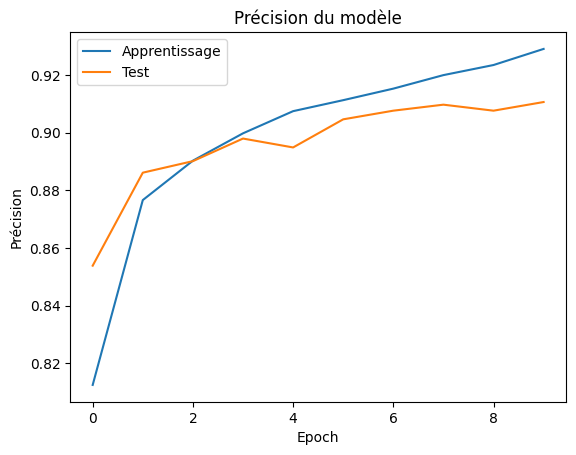

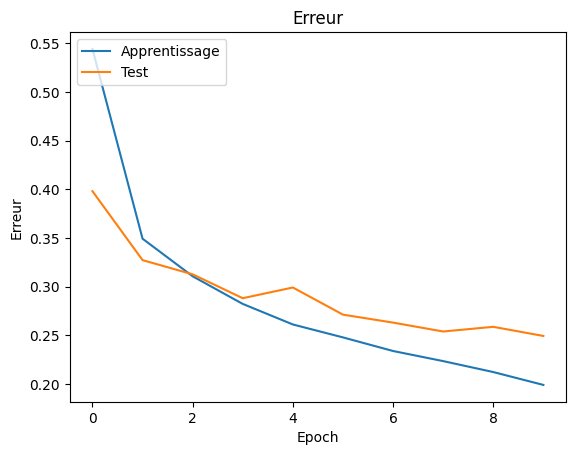

In [13]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [15]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8283 - loss: 0.4620 - val_accuracy: 0.8421 - val_loss: 0.4321
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8672 - loss: 0.4173

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8672 - loss: 0.4173 - val_accuracy: 0.8350 - val_loss: 0.4355
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8469 - loss: 0.4109 - val_accuracy: 0.8584 - val_loss: 0.3853
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8477 - loss: 0.3982 - val_accuracy: 0.8601 - val_loss: 0.3883
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8559 - loss: 0.3870 - val_accuracy: 0.8618 - val_loss: 0.3734
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8672 - loss: 0.3673 - val_accuracy: 0.8600 - val_loss: 0.3770
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8604 - loss: 0.3764 - val_accuracy: 0.8607 - val_loss: 0.3729
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8867 - loss: 0.3181 - val_accuracy: 0.8620 - val_loss: 0.3749
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8656 - loss: 0.3623 - val_accuracy: 0.8689 - 

In [18]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("../modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("../modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !


In [20]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

In [21]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.7407 - loss: 0.7420 - val_accuracy: 0.1136 - val_loss: 3.7684
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.8425 - loss: 0.4385 - val_accuracy: 0.4735 - val_loss: 1.9210
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.8697 - loss: 0.3646 - val_accuracy: 0.8097 - val_loss: 0.5261
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.8849 - loss: 0.3234 - val_accuracy: 0.8493 - val_loss: 0.4539
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.8936 - loss: 0.2990 - val_accuracy: 0.9057 - val_loss: 0.2604
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8997 - loss: 0.2811 - val_accuracy: 0.9040 - val_loss: 0.2679
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9050 - loss: 0.2651 - val_accuracy: 0.9034 - val_loss: 0.2702
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9093 - loss: 0.2516 - 

In [22]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.22901426255702972
Précision: 0.9196000099182129


In [23]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8535 - loss: 0.4025 - val_accuracy: 0.8802 - val_loss: 0.3285
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8828 - loss: 0.3256 - val_accuracy: 0.8758 - val_loss: 0.3387
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.8713 - loss: 0.3561 - val_accuracy: 0.8906 - val_loss: 0.3018
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8477 - loss: 0.4000 - val_accuracy: 0.8875 - val_loss: 0.2997
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8787 - loss: 0.3379 - val_accuracy: 0.8833 - val_loss: 0.3119
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8594 - loss: 0.3903 - val_accuracy: 0.8817 - val_loss: 0.3156
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.8817 - loss: 0.3312 - val_accuracy: 0.8949 - val_loss: 0.2927
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8867 - loss: 0.2792 - val_accu